In [10]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 


In [15]:

data = pd.read_csv('Data/kddcup.data/kddcup.data',header=None) 

In [16]:
print(data.head())

   0    1     2   3    4      5   6   7   8   9   ...  32   33   34    35  \
0   0  tcp  http  SF  215  45076   0   0   0   0  ...   0  0.0  0.0  0.00   
1   0  tcp  http  SF  162   4528   0   0   0   0  ...   1  1.0  0.0  1.00   
2   0  tcp  http  SF  236   1228   0   0   0   0  ...   2  1.0  0.0  0.50   
3   0  tcp  http  SF  233   2032   0   0   0   0  ...   3  1.0  0.0  0.33   
4   0  tcp  http  SF  239    486   0   0   0   0  ...   4  1.0  0.0  0.25   

    36   37   38   39   40       41  
0  0.0  0.0  0.0  0.0  0.0  normal.  
1  0.0  0.0  0.0  0.0  0.0  normal.  
2  0.0  0.0  0.0  0.0  0.0  normal.  
3  0.0  0.0  0.0  0.0  0.0  normal.  
4  0.0  0.0  0.0  0.0  0.0  normal.  

[5 rows x 42 columns]


In [17]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
        columns.append(c.strip())
columns.append('target')
data.columns=columns


In [18]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


In [19]:
attacks_types = {
    'normal': 'normal',
    'back': 'dos',
    'buffer_overflow': 'u2r',
    'ftp_write': 'r2l',
    'guess_passwd': 'r2l',
    'imap': 'r2l',
    'ipsweep': 'probe',
    'land': 'dos',
    'loadmodule': 'u2r',
    'multihop': 'r2l',
    'neptune': 'dos',
    'nmap': 'probe',
    'perl': 'u2r',
    'phf': 'r2l',
    'pod': 'dos',
    'portsweep': 'probe',
    'rootkit': 'u2r',
    'satan': 'probe',
    'smurf': 'dos',
    'spy': 'r2l',
    'teardrop': 'dos',
    'warezclient': 'r2l',
    'warezmaster': 'r2l',
} 

data['Attack Type'] = data.target.apply(lambda r:attacks_types[r[:-1]]) 

In [20]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [21]:
data['target'].value_counts() 

target
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64

In [22]:
#Finding categorical features
num_cols = data._get_numeric_data().columns

cate_cols = list(set(data.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')


In [23]:

cate_cols 

['service', 'flag', 'protocol_type']

<Axes: ylabel='service'>

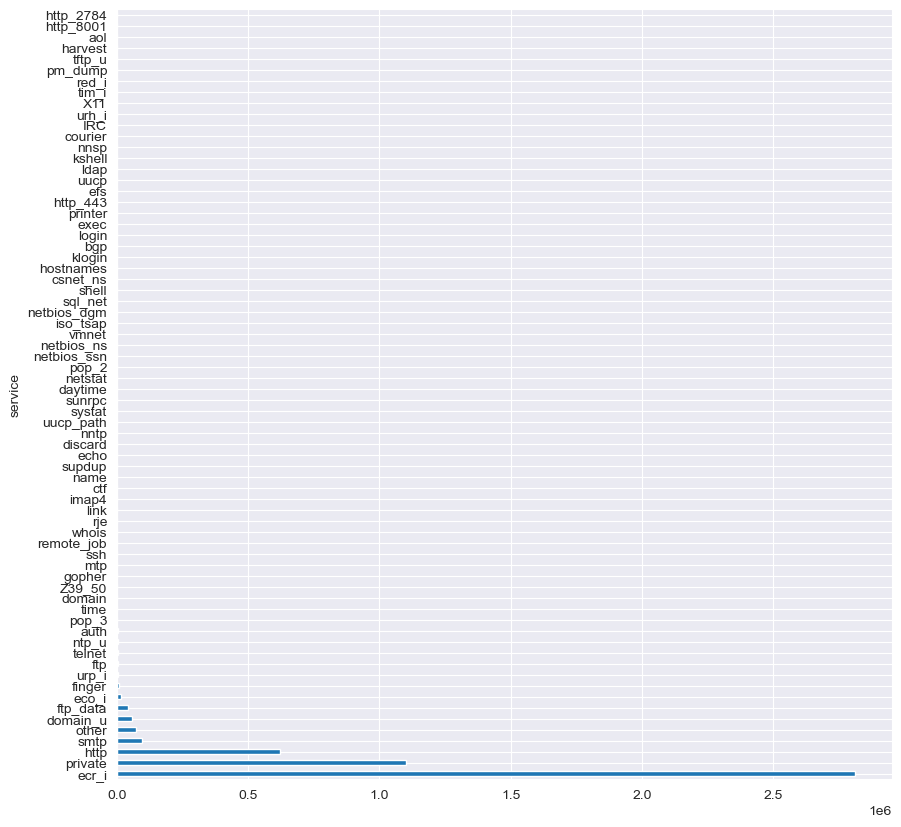

In [24]:
data['service'].value_counts().plot(kind='barh', figsize=(10,10))

<Axes: xlabel='protocol_type'>

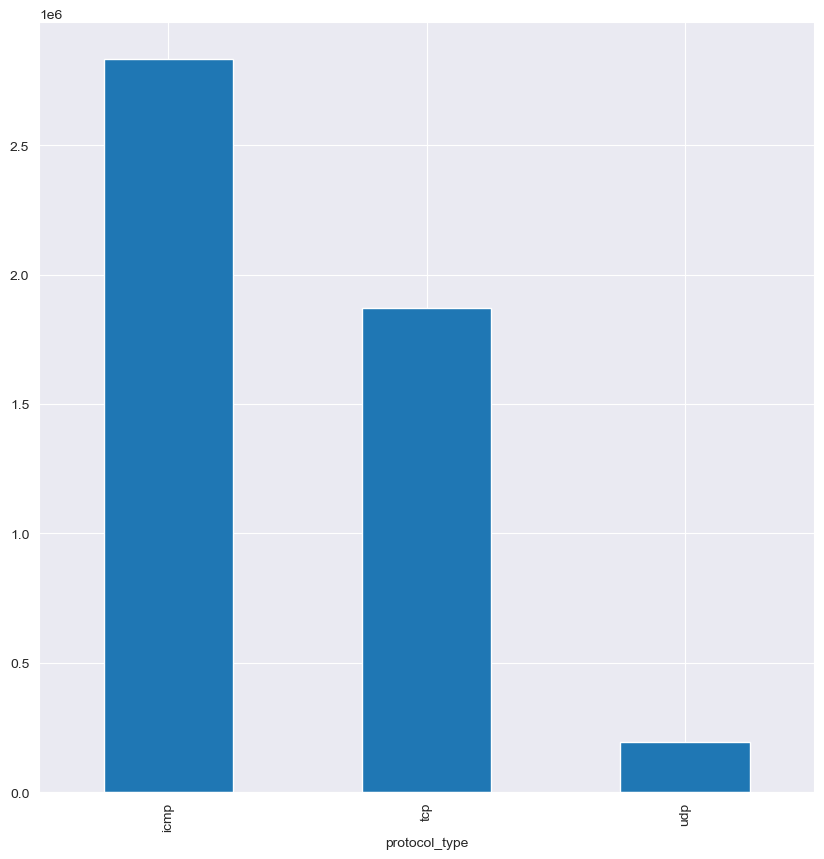

In [25]:
data['protocol_type'].value_counts().plot(kind='bar', figsize=(10,10))
 

<Axes: xlabel='protocol_type'>

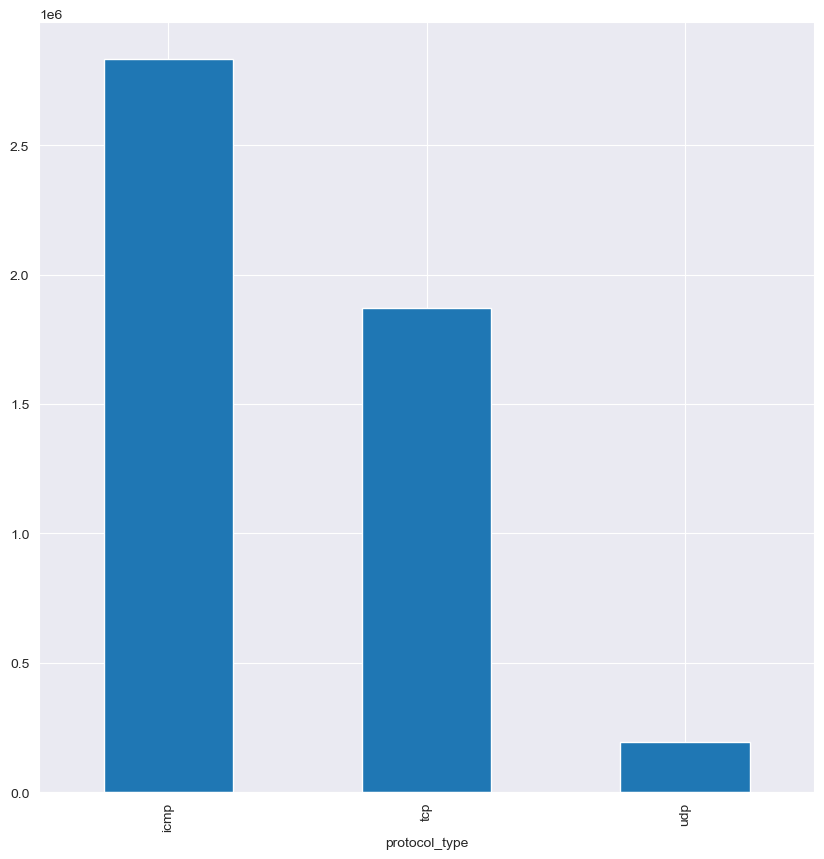

In [26]:
data['protocol_type'].value_counts().plot(kind='bar', figsize=(10,10))
  

In [27]:
print(data['target'].value_counts())

target
smurf.              2807886
neptune.            1072017
normal.              972781
satan.                15892
ipsweep.              12481
portsweep.            10413
nmap.                  2316
back.                  2203
warezclient.           1020
teardrop.               979
pod.                    264
guess_passwd.            53
buffer_overflow.         30
land.                    21
warezmaster.             20
imap.                    12
rootkit.                 10
loadmodule.               9
ftp_write.                8
multihop.                 7
phf.                      4
perl.                     3
spy.                      2
Name: count, dtype: int64


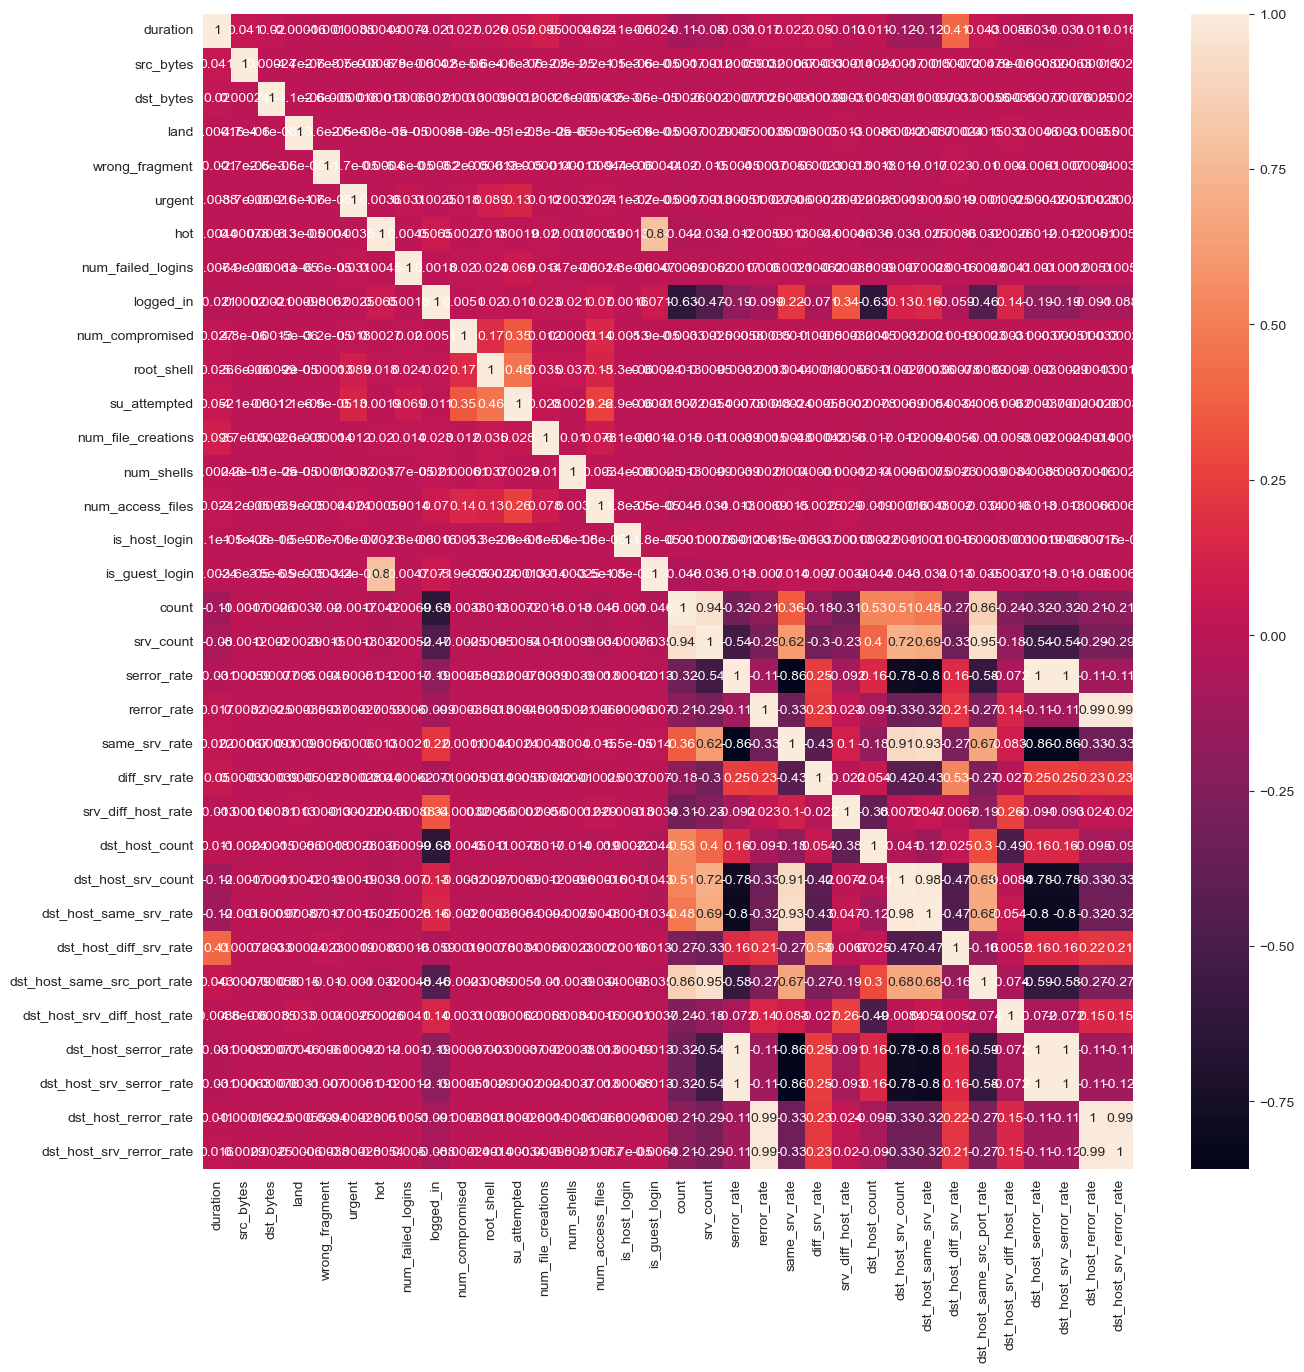

In [39]:
# lets check for numerical columns
num_cols = data._get_numeric_data().columns

corr = data[num_cols].corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True)
plt.show()

In [ ]:
#This variable is highly correlated with num_compromised and should be ignored for analysis.
#(Correlation = 0.9938277978738366)
data.drop('num_root',axis = 1,inplace = True)

#This variable is highly correlated with serror_rate and should be ignored for analysis.
#(Correlation = 0.9983615072725952)
data.drop('srv_serror_rate',axis = 1,inplace = True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9947309539817937)
data.drop('srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_serror_rate and should be ignored for analysis.
#(Correlation = 0.9993041091850098)
data.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9869947924956001)
data.drop('dst_host_serror_rate',axis = 1, inplace=True)

#This variable is highly correlated with srv_rerror_rate and should be ignored for analysis.
#(Correlation = 0.9821663427308375)
data.drop('dst_host_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with rerror_rate and should be ignored for analysis.
#(Correlation = 0.9851995540751249)
data.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

#This variable is highly correlated with dst_host_srv_count and should be ignored for analysis.
#(Correlation = 0.9736854572953938)
data.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [40]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.,normal
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.,normal
2,0,tcp,http,SF,236,1228,0,0,0,0,...,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.,normal
3,0,tcp,http,SF,233,2032,0,0,0,0,...,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.,normal
4,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,tcp,http,SF,212,2288,0,0,0,0,...,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898427,0,tcp,http,SF,219,236,0,0,0,0,...,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898428,0,tcp,http,SF,218,3610,0,0,0,0,...,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898429,0,tcp,http,SF,219,1234,0,0,0,0,...,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,normal


In [41]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
data['protocol_type'] = data['protocol_type'].map(pmap) 

In [42]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
data['flag'] = data['flag'].map(fmap)

In [44]:
data.drop('service',axis = 1,inplace= True)

In [45]:
data

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,1,0,215,45076,0,0,0,0,0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,normal.,normal
1,0,1,0,162,4528,0,0,0,0,0,...,1.0,0.0,1.00,0.00,0.0,0.00,0.0,0.0,normal.,normal
2,0,1,0,236,1228,0,0,0,0,0,...,1.0,0.0,0.50,0.00,0.0,0.00,0.0,0.0,normal.,normal
3,0,1,0,233,2032,0,0,0,0,0,...,1.0,0.0,0.33,0.00,0.0,0.00,0.0,0.0,normal.,normal
4,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.25,0.00,0.0,0.00,0.0,0.0,normal.,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4898426,0,1,0,212,2288,0,0,0,0,0,...,1.0,0.0,0.33,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898427,0,1,0,219,236,0,0,0,0,0,...,1.0,0.0,0.25,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898428,0,1,0,218,3610,0,0,0,0,0,...,1.0,0.0,0.20,0.05,0.0,0.01,0.0,0.0,normal.,normal
4898429,0,1,0,219,1234,0,0,0,0,0,...,1.0,0.0,0.17,0.05,0.0,0.01,0.0,0.0,normal.,normal


In [46]:
# pip install TensorFlow 
# pip install keras

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score 
import time

In [51]:
data = data.drop(['target',], axis=1)
print(data.shape)

# Target variable and train set
Y = data[['Attack Type']]
X = data.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(4898431, 37)
(3281948, 36) (1616483, 36)
(3281948, 1) (1616483, 1)


In [49]:
model = DecisionTreeClassifier(criterion="entropy", max_depth = 4)


In [53]:
start_time = time.time()
model.fit(X_train, Y_train.values.ravel())
end_time = time.time() 

In [54]:
print("Training time: ",end_time-start_time) 

Training time:  37.083683252334595


In [56]:
start_time = time.time()
Y_test_pred2 = model.predict(X_test)
end_time = time.time() 

In [57]:
print("Testing time: ",end_time-start_time) 

Testing time:  0.6343851089477539


In [58]:
print("Train score is:", model.score(X_train, Y_train))
print("Test score is:",model.score(X_test,Y_test))

Train score is: 0.9958131573077941
Test score is: 0.9957970482832174


In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_test_pred2))
print(classification_report(Y_test, Y_test_pred2))


[[1280081    1375      27       0       0]
 [     22  320905      94       0       0]
 [      1    4890    8703       0       0]
 [      0     362       3       0       0]
 [      0      18       2       0       0]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         dos       1.00      1.00      1.00   1281483
      normal       0.98      1.00      0.99    321021
       probe       0.99      0.64      0.78     13594
         r2l       0.00      0.00      0.00       365
         u2r       0.00      0.00      0.00        20

    accuracy                           1.00   1616483
   macro avg       0.59      0.53      0.55   1616483
weighted avg       1.00      1.00      1.00   1616483


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
#!pip install graphviz



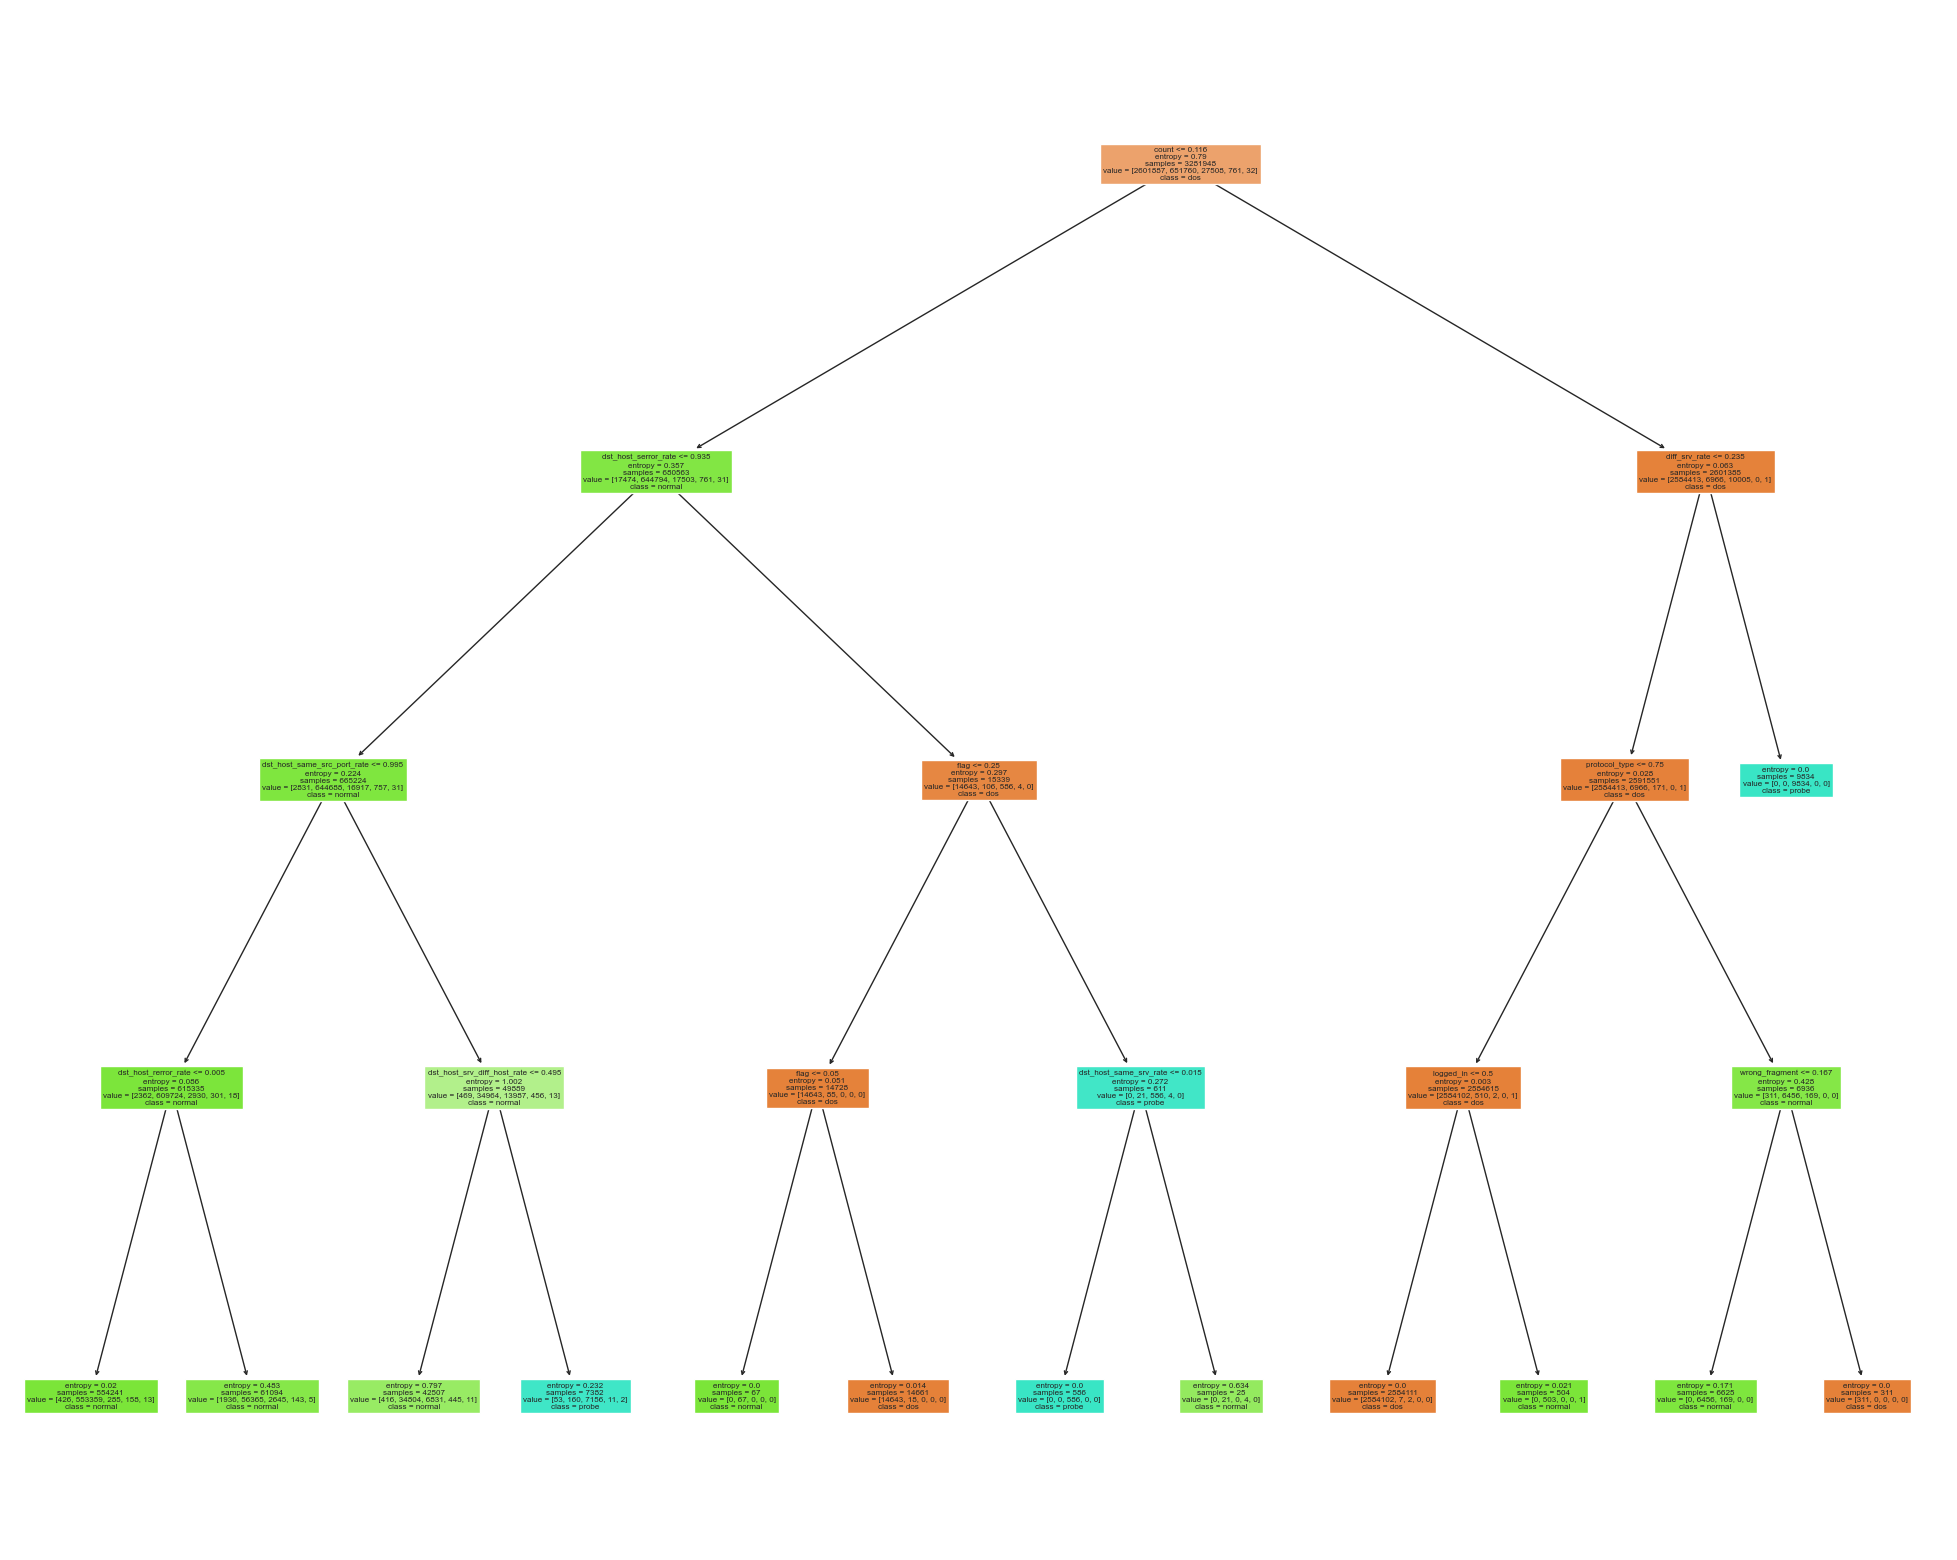

In [72]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Your existing setup
feature_names_list = data.columns.tolist()  # Adjusted to your DataFrame's columns
classes_list = model.classes_.tolist()  # Convert classes to a list

# Assuming 'model' is your trained decision tree classifier
fig = plt.figure(figsize=(25,20))

# Use the list for 'class_names' parameter
plot_tree(model, feature_names=feature_names_list, class_names=classes_list, filled=True)

plt.show()  # Display the plot


In [73]:
#! pip install pickle-mixin


In [74]:
import pickle
# save the model to disk
filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))



In [75]:
# load the model from disk

modl = pickle.load(open(filename, 'rb'))
result = modl.score(X_test, Y_test)
print(result)


0.9957970482832174


In [76]:
# lets load unlabeled data 

data_unlabeled = pd.read_csv('Data/kddcup.testdata.unlabeled/kddcup.testdata.unlabeled',header=None)

In [81]:
def proces_data(df):
    columns=[]
    cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""
    
    for c in cols.split(','):
        if(c.strip()):
            columns.append(c.strip())
    df.columns=columns
    df.drop(columns=['num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_same_srv_rate'],inplace=True) 
    
    pmap = {'icmp':0,'tcp':1,'udp':2}
    fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
    df['protocol_type'] = df['protocol_type'].map(pmap)
    df['flag'] = df['flag'].map(fmap)
    df.drop('service',axis = 1,inplace= True)
    return df

data_unlabeled = proces_data(data_unlabeled)
    
    

In [82]:
data_unlabeled.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,2,0,105,146,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1,1,0.00,1.00,0.0
1,0,2,0,105,146,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,255,254,0.01,0.00,0.0
2,0,2,0,105,146,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,255,254,0.01,0.00,0.0
3,0,2,0,105,146,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,255,254,0.01,0.00,0.0
4,0,2,0,105,146,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,255,254,0.01,0.01,0.0


In [83]:
# #lets see the prediction of the model on the unlabeled data 
# X_unlabeled = sc.fit_transform(data_unlabeled)
# Y_unlabeled_pred = model.predict(X_unlabeled)  


ValueError: X has 32 features, but DecisionTreeClassifier is expecting 36 features as input.

In [ ]:
# Y_unlabeled_pred

In [85]:
# data.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'is_host_login', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'Attack Type'],
      dtype='object')

In [86]:
# data_unlabeled.columns

Index(['duration', 'protocol_type', 'flag', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_file_creations',
       'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'],
      dtype='object')